# Subsampling of PCManifold data

We use the PCManifold class to subsample a massive data set, so that the new sampling is smaller in size and uniform.

In [1]:
# import all necessary packages
import numpy as np

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

%matplotlib inline

from sklearn.datasets import make_swiss_roll, make_s_curve

import datafold.pcfold as pfold

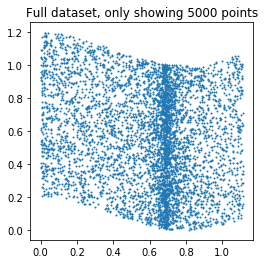

In [2]:
# create large data set with nonuniform sampling
np.random.seed(5)

n_pts = int(1e5)

data = np.random.rand(n_pts,2)
data[:,0] = np.sin(4*data[:,0])**2/5+data[:,0]
data[:,1] = np.cos(2*data[:,0])**2/5+data[:,1]

plot_idx = np.random.permutation(n_pts)[0:5000]

fig = plt.figure(figsize=(4,4))
plt.scatter(*data[plot_idx,:].T, s=1)
plt.title("Full dataset, only showing %g points" % (len(plot_idx)));

In [3]:
# subsample it with given minimal distance.
# default is 1/2 the cutoff computed by the optimization, which already reduces the data size significantly.

pcm0 = pfold.PCManifold(data)
pcm0.optimize_parameters(n_subsample=100) # only use 100 samples to estimate scales
pcm1, indices = pfold.subsample(pcm0, min_distance=pcm0.cut_off / 10);

Text(0.5, 1.0, '#pts: 78')

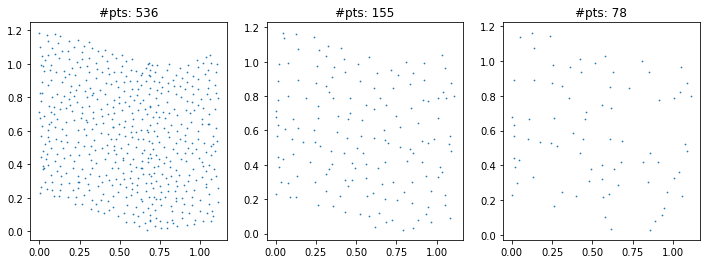

In [4]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
ax[0].scatter(*pcm1.T, s=.5)
ax[0].set_title("#pts: %g" % pcm1.shape[0])

# subsample again
pcm1.optimize_parameters(n_subsample=1000)
pcm2,indices = pfold.subsample(pcm1)

ax[1].scatter(*pcm2.T, s=.5)
ax[1].set_title("#pts: %g" % pcm2.shape[0])

# subsample again
pcm2.optimize_parameters(n_subsample=1000)
pcm3,indices = pfold.subsample(pcm2)

ax[2].scatter(*pcm3.T, s=.5)
ax[2].set_title("#pts: %g" % pcm3.shape[0])

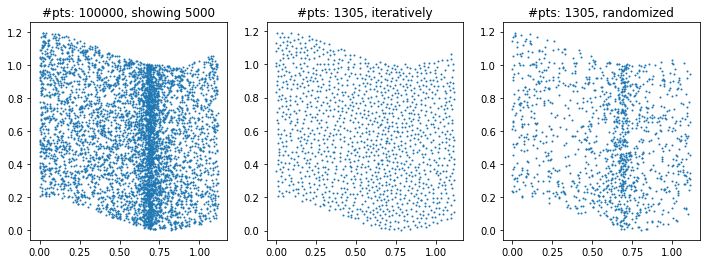

In [5]:
# The subsampling is more uniform (and faster) when we directly subsample to the desired minimal distance between points.
# This distance can be set directly.

pcm0 = pfold.PCManifold(data)
pcmx,indices = pfold.subsample(pcm0, min_distance=0.02)
pcmr,indicesr = pfold.subsample(pcm0, min_distance=0.02, n_samples=len(indices), randomized=True)

fig,ax = plt.subplots(1,3,figsize=(12,4))
ax[0].scatter(*data[plot_idx,:].T, s=1)
ax[0].set_title("#pts: %g, showing %g" % (data.shape[0], len(plot_idx)))

ax[1].scatter(*pcmx.T, s=1)
ax[1].set_title("#pts: %g, iteratively" % pcmx.shape[0]);

ax[2].scatter(*pcmr.T, s=1)
ax[2].set_title("#pts: %g, randomized" % pcmr.shape[0]);
